<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-and-preprocessing" data-toc-modified-id="Initialization-and-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization and preprocessing</a></span></li>

<li><span><a href="#Term-Frequency-(TF)" data-toc-modified-id="Term-Frequency-(TF)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Term Frequency (TF)</a></span></li>

<li><span><a href="#Inverse-Document-Frequency-(IDF)" data-toc-modified-id="Inverse-Document-Frequency-(IDF)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inverse Document Frequency (IDF)</a></span></li>

<li><span><a href="#Compute-TFIDF" data-toc-modified-id="Compute-TFIDF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compute TFIDF</a></span></li>

<li><span><a href="#Convert-to-sparse-matrix" data-toc-modified-id="Convert-to-sparse-matrix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Convert to sparse matrix</a></span></li>

<li><span><a href="#Compare-our-matrix-with-Python-implementation" data-toc-modified-id="Compare-our-matrix-with-Python-implementation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare our matrix with Python implementation</a></span></li>

<li><span><a href="#Build-a-bar-chart" data-toc-modified-id="Build-a-bar-chart"><span class="toc-item-num">7&nbsp;&nbsp;</span>Build a bar chart</a></span></li>

<li><span><a href="#Build-a-word-cloud" data-toc-modified-id="Build-a-word-cloud"><span class="toc-item-num">8&nbsp;&nbsp;</span>Build a word cloud</a></span></li></ul></div>

# TF/IDF from scratch

## Initialization and preprocessing
Let's take two sentences as an example

In [1]:
import pandas as pd
%matplotlib inline 

In [2]:
#Here you can also get a subset of your own dataset of comments
docA='I went skiing with my friends last weekend'
docB='My friends and I play poker every weekend'
doc=[docA, docB]

Now, we tokenize all words of our corpus to build a dictionary and get rid of stopwords and punctuation

In [3]:
from nltk import word_tokenize
from string import punctuation
from nltk.corpus import stopwords

stopW = stopwords.words('english') + list(punctuation)

In [4]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
#import nltk #execute only if necesseray
#nltk.download('punkt') #execute only if necesseray

In [5]:
bag_of_words = [word_tokenize(text.lower()) for text in doc]

In [6]:
bag_of_words

[['i', 'went', 'skiing', 'with', 'my', 'friends', 'last', 'weekend'],
 ['my', 'friends', 'and', 'i', 'play', 'poker', 'every', 'weekend']]

In [7]:
for i, sent in enumerate(bag_of_words):
    bag_of_words[i] = [w for w in bag_of_words[i] if w not in stopW]

In [8]:
bag_of_words

[['went', 'skiing', 'friends', 'last', 'weekend'],
 ['friends', 'play', 'poker', 'every', 'weekend']]

Get all unique words of the corpus

In [9]:
wordSet = set().union(*bag_of_words)
wordSet

{'every', 'friends', 'last', 'play', 'poker', 'skiing', 'weekend', 'went'}

Now, we create a list with one dictionary for each review, containing all words of the corpus

In [12]:
wordDict = []

for i in range(len(bag_of_words)):
    wordDict.append(dict.fromkeys(wordSet, 0))

In [13]:
wordDict

[{'every': 0,
  'friends': 0,
  'last': 0,
  'play': 0,
  'poker': 0,
  'skiing': 0,
  'weekend': 0,
  'went': 0},
 {'every': 0,
  'friends': 0,
  'last': 0,
  'play': 0,
  'poker': 0,
  'skiing': 0,
  'weekend': 0,
  'went': 0}]

If a review countains a word, we're adding 1 to its count

In [14]:
for i, sent in enumerate(bag_of_words): 
    for word in sent:
        wordDict[i][word]+=1

In [15]:
wordDict

[{'every': 0,
  'friends': 1,
  'last': 1,
  'play': 0,
  'poker': 0,
  'skiing': 1,
  'weekend': 1,
  'went': 1},
 {'every': 1,
  'friends': 1,
  'last': 0,
  'play': 1,
  'poker': 1,
  'skiing': 0,
  'weekend': 1,
  'went': 0}]

We have our Document Term Matrix

In [16]:
df = pd.DataFrame(wordDict)
df.head()

,every,friends,last,play,poker,skiing,weekend,went
0,0,1,1,0,0,1,1,1
1,1,1,0,1,1,0,1,0


We build a bar plot

In [17]:
df_mean = df.mean().sort_values(ascending=False).to_frame(name='occurence mean')

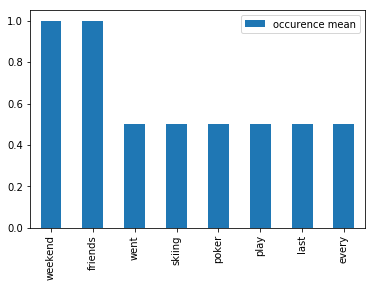

In [18]:
df_mean[:8].plot.bar()

## Term Frequency (TF)

Here instead of using a raw count, let's try a term frequency adjusted for document length

In [19]:
def compute_TF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [20]:
tfBow = []
for i in range(len(bag_of_words)):
    tfBow.append(compute_TF(wordDict[i], bag_of_words[i]))

In [21]:
tfBow

[{'every': 0.0,
  'friends': 0.2,
  'last': 0.2,
  'play': 0.0,
  'poker': 0.0,
  'skiing': 0.2,
  'weekend': 0.2,
  'went': 0.2},
 {'every': 0.2,
  'friends': 0.2,
  'last': 0.0,
  'play': 0.2,
  'poker': 0.2,
  'skiing': 0.0,
  'weekend': 0.2,
  'went': 0.0}]

## Inverse Document Frequency (IDF)

In [22]:
import math
def compute_IDF(wordDict):
    idfDict = {}
    N = len(wordDict)
    idfDict = dict.fromkeys(wordDict[0].keys(), 0)
    for doc in wordDict:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1 #if the word is in the document
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
    return idfDict

In [23]:
idfs = compute_IDF(wordDict)

In [24]:
idfs

{'every': 0.3010299956639812,
 'friends': 0.0,
 'last': 0.3010299956639812,
 'play': 0.3010299956639812,
 'poker': 0.3010299956639812,
 'skiing': 0.3010299956639812,
 'weekend': 0.0,
 'went': 0.3010299956639812}

## Compute TFIDF

In [25]:
def compute_TFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [26]:
tfidf = []
for i in range(len(tfBow)):
    tfidf.append(compute_TFIDF(tfBow[i], idfs))

In [27]:
tfidf = pd.DataFrame(tfidf)
tfidf.head()

,every,friends,last,play,poker,skiing,weekend,went
0,0.000000,0.0,0.060206,0.000000,0.000000,0.060206,0.0,0.060206
1,0.060206,0.0,0.000000,0.060206,0.060206,0.000000,0.0,0.000000


In [28]:
print('A few words with lowest tfidf\n\n',tfidf.apply(sum).sort_values()[:5])
print('\n\nWords with largest tfidf\n\n',tfidf.apply(sum).sort_values()[-5:])

A few words with lowest tfidf

 friends    0.000000
weekend    0.000000
every      0.060206
last       0.060206
play       0.060206
dtype: float64


Words with largest tfidf

 last      0.060206
play      0.060206
poker     0.060206
skiing    0.060206
went      0.060206
dtype: float64


## Compare our matrix with Python implementation

In [29]:
#Here you can also get a subset of your own dataset of comments
docA='I went skiing with my friends last weekend'
docB='My friends and I play poker every weekend'
doc=[docA, docB]

In [43]:
docA='I went skiing with my friends last weekend'
docB='My friends and I play poker every weekend'
docC='My name is Ivan and I play foorbal last week'
docD='She goes shopping every year with friends'
doc=[docA, docB, docC, docD]

In [44]:
from string import punctuation
from nltk.corpus import stopwords

stopW = stopwords.words('english') + list(punctuation)
more_stopwords=['n\'t','...','\'ve','\'re', 'ã\x9dou', "''" ]

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

vect = TfidfVectorizer(tokenizer=word_tokenize,stop_words=stopW+more_stopwords)
vect_transformed = vect.fit_transform(doc)

In [46]:
import numpy as np
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = vect_transformed.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['friends' 'last' 'every' 'play' 'weekend' 'foorbal' 'ivan' 'name' 'week'
 'goes']

Largest tfidf: 
['poker' 'went' 'skiing' 'year' 'shopping' 'goes' 'week' 'name' 'ivan'
 'foorbal']


In [47]:
df_sklearn = pd.DataFrame(vect_transformed.todense(), columns = feature_names)
df_sklearn.head()

,every,foorbal,friends,goes,ivan,last,name,play,poker,shopping,skiing,week,weekend,went,year
0,0.000000,0.000000,0.334067,0.000000,0.000000,0.412640,0.000000,0.000000,0.000000,0.000000,0.523381,0.000000,0.412640,0.523381,0.000000
1,0.435847,0.000000,0.352855,0.000000,0.000000,0.000000,0.000000,0.435847,0.552816,0.000000,0.000000,0.000000,0.435847,0.000000,0.000000
2,0.000000,0.436719,0.000000,0.000000,0.436719,0.344315,0.436719,0.344315,0.000000,0.000000,0.000000,0.436719,0.000000,0.000000,0.000000
3,0.392784,0.000000,0.317993,0.498197,0.000000,0.000000,0.000000,0.000000,0.000000,0.498197,0.000000,0.000000,0.000000,0.000000,0.498197


They have similar values. Not exactly the same because the formulas used to comput the TF-IDF scores are different.

## Build a bar chart

In [48]:
df_sklearn_mean = df_sklearn.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
df_sklearn_mean.head()

,tfidf mean
friends,0.251229
weekend,0.212122
every,0.207158
play,0.195040
last,0.189239


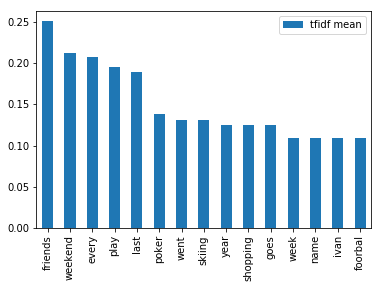

In [49]:
df_sklearn_mean[:20].plot.bar()

## Build a word cloud

In [50]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [51]:
dict_words_tfidf = df_sklearn_mean[df_sklearn_mean['tfidf mean'] != 0].to_dict()['tfidf mean']

In [52]:
#read mask (just for fun)
hotel_mask = np.array(Image.open("hotel.png"))

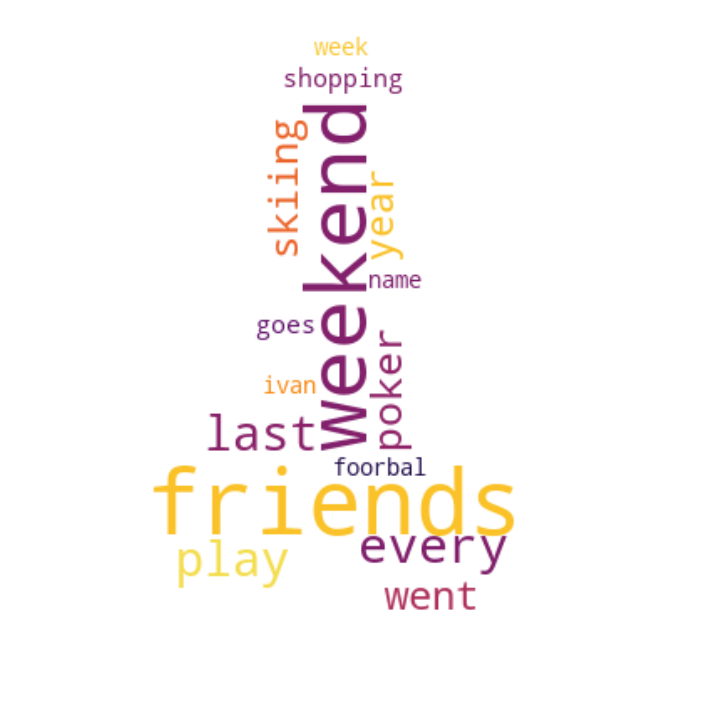

In [53]:
wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100, mask=hotel_mask)
wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now it's your turn! Use your own datasets to get key insights about the main topics discussed in the reviews**